In [2]:
!unzip archive.zip

Archive:  archive.zip
replace iplauction2023.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!pip install openpyxl


In [4]:
import pandas as pd
from matplotlib import pyplot as plt


In [7]:
df1=pd.read_csv('iplauction2023.csv')
df1.head(3)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD


In [8]:
df1.shape

(309, 7)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


#### Data Cleaning: Handle Missing Values

In [10]:
df1.isnull().sum()

,0
name,0
player style,0
nationality,0
base price (in lacs),158
final price (in lacs),71
franchise,71
status,0


In [12]:
df1[df1['base price (in lacs)'].isnull()]

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
152,Rajat Patidar,Batter,India,NaN,20.0,RCB,RETAINED
153,Matheesha Pathirana,Bowler,Sri Lanka,NaN,20.0,CSK,RETAINED
154,Tristan Stubbs,WK-Batter,South Africa,NaN,20.0,MI,RETAINED
155,Ravi Bishnoi,Bowler,India,NaN,400.0,LSG,RETAINED
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [20]:
df2=df1.copy()
df2['base price (in lacs)']=df2['base price (in lacs)'].fillna(0)
df2

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED


Players marked as 'RETAINED' did not go through the auction, hence have no base price. These entries were preserved and base price was marked accordingly as 0.

In [21]:
df2.isnull().sum()

,0
name,0
player style,0
nationality,0
base price (in lacs),0
final price (in lacs),71
franchise,71
status,0


In [22]:
df3=df2.copy()
df3['final price (in lacs)']=df3['final price (in lacs)'].fillna(0)
df3['franchise']=df3['franchise'].fillna('UNSOLD')
df3

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED


Final Price marked as 0 for unsold players, and Franchise also marked as "UNSOLD" for unsold players

In [23]:
df3.isnull().sum()

,0
name,0
player style,0
nationality,0
base price (in lacs),0
final price (in lacs),0
franchise,0
status,0


In [27]:
df3.head()



,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


#### FEATURE ENGINEERING: Creating new columns

In [28]:
def encode_status(status):
    if status=='UNSOLD':
        return 0
    elif status=='SOLD':
        return 1
    elif status=='RETAINED':
        return 2
    else:
        return -1
df4=df3.copy()
df4['status_encoded']=df4['status'].apply(encode_status)
df4

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,status_encoded
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED,2
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD,0
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD,0
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,1
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,1
...,...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED,2
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED,2
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED,2
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED,2


In [30]:
def price_diff(row):
    if row['status_encoded']==1:
        return row['final price (in lacs)']-row['base price (in lacs)']
    else:
        return 0
df4['price_differece']=df4.apply(price_diff,axis=1)
df4

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,status_encoded,price_differece
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED,2,0.0
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD,0,0.0
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD,0,0.0
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,1,0.0
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,1,0.0
...,...,...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED,2,0.0
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED,2,0.0
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED,2,0.0
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED,2,0.0


In [31]:
df4.isnull().sum()

,0
name,0
player style,0
nationality,0
base price (in lacs),0
final price (in lacs),0
franchise,0
status,0
status_encoded,0
price_differece,0


In [32]:
df5=df4.copy()
df5['is_overseas']=df5['nationality'].apply(lambda x:0 if x=='India' else 1)
df5

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status,status_encoded,price_differece,is_overseas
0,Harshit Rana,Bowler,India,0.0,20.0,KKR,RETAINED,2,0.0,0
1,Ekant Sen,Batter,India,20.0,0.0,UNSOLD,UNSOLD,0,0.0,0
2,Wayne Parnell,Allrounder,South Africa,75.0,0.0,UNSOLD,UNSOLD,0,0.0,1
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD,1,0.0,1
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,0.0,1200.0,CSK,RETAINED,2,0.0,0
305,Moeen Ali,Allrounder,England,0.0,800.0,CSK,RETAINED,2,0.0,1
306,Ruturaj Gaikwad,Batter,India,0.0,600.0,CSK,RETAINED,2,0.0,0
307,Rishabh Pant,WK-Batter,India,0.0,1600.0,DC,RETAINED,2,0.0,0


Added columns status_encoded
The status_encoded column in the IPL auction dataset has three categories representing a player's auction outcome:

0 (Unsold): Players who were not bought by any franchise during the auction.

1 (Sold): Players who were successfully bought by a franchise in the auction.

2 (Retained): Players retained by franchises from previous seasons and hence did not participate in the current auction.
Added price_difference column for sold players, added is_overseas column

#### VISUALIZATION AND EDA

##### 1. Top 5 players with highest price difference

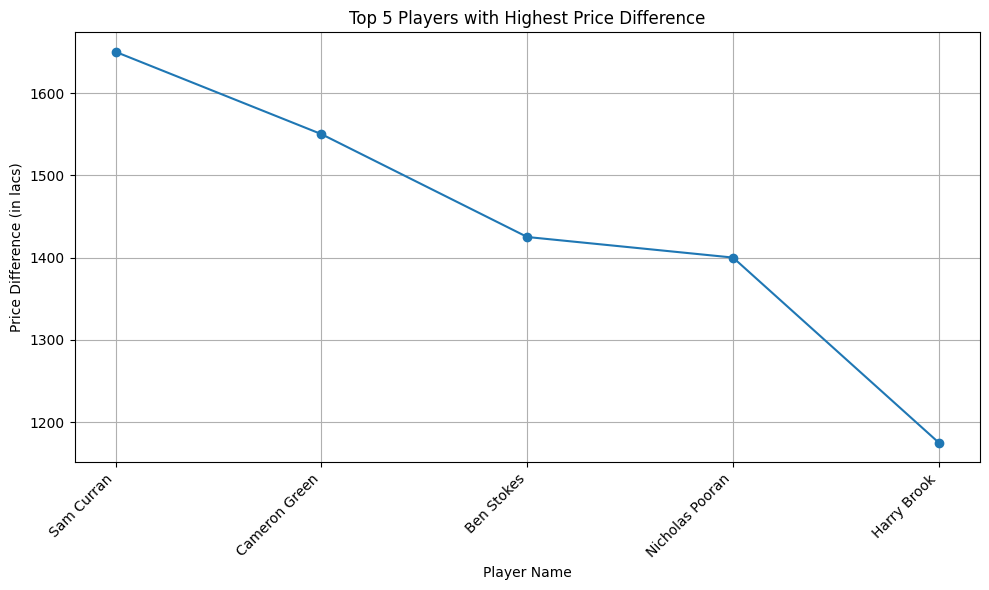

In [34]:

# Get the top 5 players with the highest price difference
top_5_price_diff = df5.nlargest(5, 'price_differece')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(top_5_price_diff['name'], top_5_price_diff['price_differece'], marker='o')
plt.xlabel('Player Name')
plt.ylabel('Price Difference (in lacs)')
plt.title('Top 5 Players with Highest Price Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights
Sam Curran was the player who was bought at the highest price difference

##### 2. Retained players by franchise

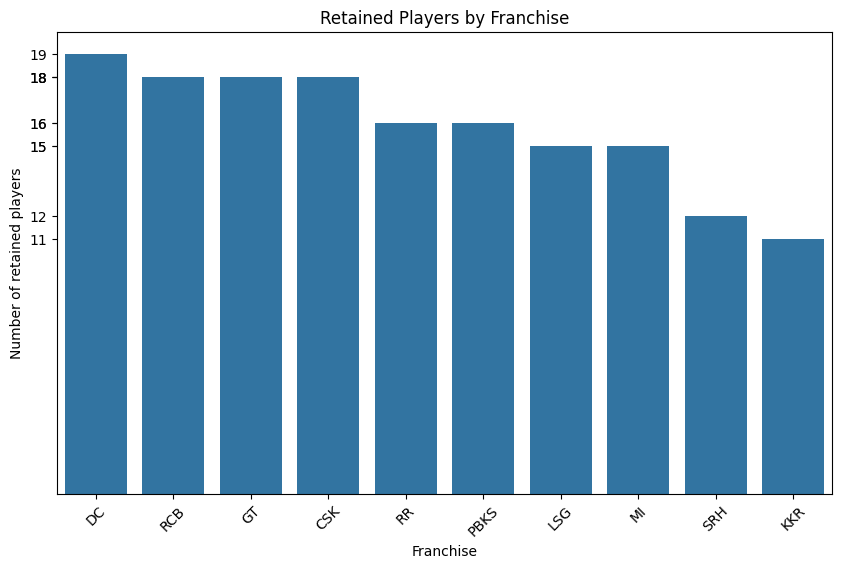

In [40]:
import seaborn as sns
retained_df=df5[df5['status_encoded']==2]
retained_count=retained_df['franchise'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=retained_count.index,y=retained_count.values)
plt.xlabel('Franchise')
plt.ylabel('Number of retained players')
plt.title('Retained Players by Franchise')
plt.xticks(rotation=45)
plt.yticks(retained_count.values.round(0).astype(int))

plt.show()

## Insights
DC retained the most number of players.(19)
RCB,GT and CSK retained the same number of players(18)
KKR retained the least number of players.(11)

##### 3.Sold vs Unsold vs Retained Distribution

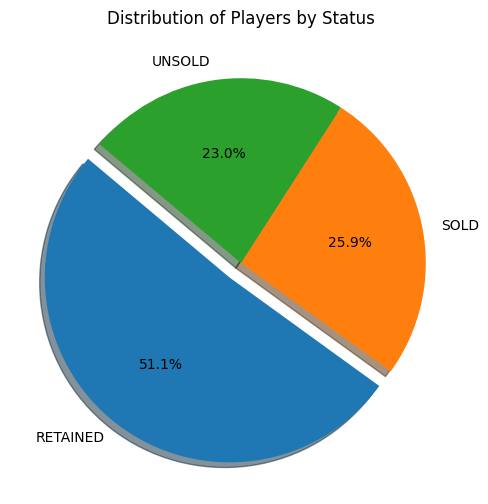

In [45]:
status_counts=df5['status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts,labels=status_counts.index,autopct='%1.1f%%',startangle=140,explode=(0.1,0,0),shadow=True)
plt.title('Distribution of Players by Status')
plt.show()

## Insights
Approximately half the players were retained by the teams, and amount of players sold and unsold differ by 2.9%

##### 4.Franchise Spending

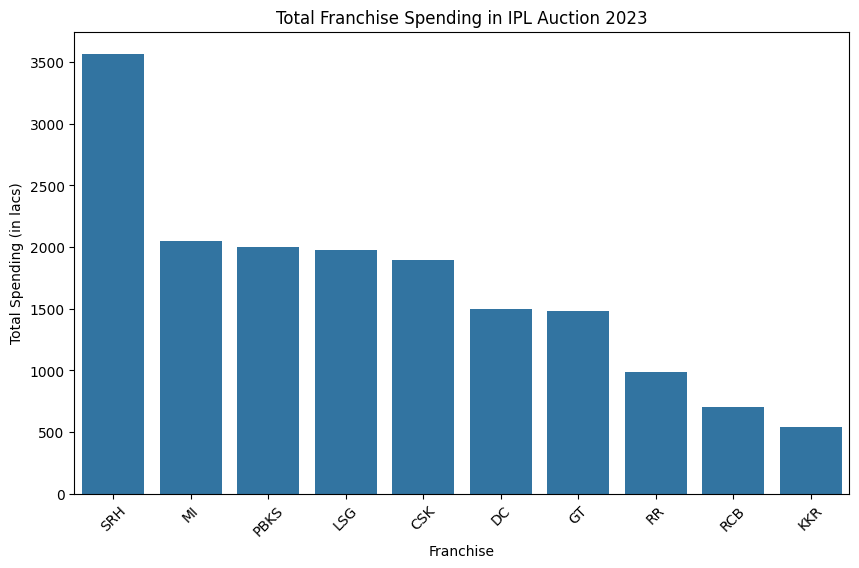

In [46]:
sold_df=df5[df5['status_encoded']==1] #filter only sold players
franchise_spending=sold_df.groupby('franchise')['final price (in lacs)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=franchise_spending.index,y=franchise_spending.values)
plt.xlabel('Franchise')
plt.ylabel('Total Spending (in lacs)')
plt.title('Total Franchise Spending in IPL Auction 2023')
plt.xticks(rotation=45)
plt.show()

## Insights
SRH spent the most in the auction, whereas KKR spent the least.